# Selecting Data

This notebook walks through a number of the fundamental data manipulations that allow you to *select* rows and columns of a data frame.  These operations do not transform them in any way — they simply let you subset the data, filtering it to only the rows and columns you want.

We'll talk about:

1. Selecting columns
2. Selecting rows
3. Jointly selecting rows and columns
4. Renaming columns

This notebook uses the “MovieLens + IMDB/RottenTomatoes” data from the [HETREC data](https://grouplens.org/datasets/hetrec-2011/).

## Setup

First we will import our modules:

In [1]:
import numpy as np
import pandas as pd

Then import the HETREC MovieLens data.  A few notes:

- Tab-separated data
- Not UTF-8 - latin-1 encoding seems to work
- Missing data encoded as `\N` (there's a good chance that what we have is a PostgreSQL data dump!)

In [2]:
movies = pd.read_csv('hetrec2011-ml/movies.dat', delimiter='\t', encoding='latin1', na_values=['\\N'])
movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10197 non-null  int64  
 1   title                   10197 non-null  object 
 2   imdbID                  10197 non-null  int64  
 3   spanishTitle            10197 non-null  object 
 4   imdbPictureURL          10016 non-null  object 
 5   year                    10197 non-null  int64  
 6   rtID                    9886 non-null   object 
 7   rtAllCriticsRating      9967 non-null   float64
 8   rtAllCriticsNumReviews  9967 non-null   float64
 9   rtAllCriticsNumFresh    9967 non-null   float64
 10  rtAllCriticsNumRotten   9967 non-null   float64
 11  rtAllCriticsScore       9967 non-null   float64
 12  rtTopCriticsRating      9967 non-null   float64
 13  rtTopCriticsNumReviews  9967 non-null   float64
 14  rtTopCriticsNumFresh    9967 non-null 

## Inspecting Data Frames

We can see the *shape*:

In [4]:
movies.shape

(10197, 21)

We can see the *info* - columns and types, along with nonzero value counts:

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10197 non-null  int64  
 1   title                   10197 non-null  object 
 2   imdbID                  10197 non-null  int64  
 3   spanishTitle            10197 non-null  object 
 4   imdbPictureURL          10016 non-null  object 
 5   year                    10197 non-null  int64  
 6   rtID                    9886 non-null   object 
 7   rtAllCriticsRating      9967 non-null   float64
 8   rtAllCriticsNumReviews  9967 non-null   float64
 9   rtAllCriticsNumFresh    9967 non-null   float64
 10  rtAllCriticsNumRotten   9967 non-null   float64
 11  rtAllCriticsScore       9967 non-null   float64
 12  rtTopCriticsRating      9967 non-null   float64
 13  rtTopCriticsNumReviews  9967 non-null   float64
 14  rtTopCriticsNumFresh    9967 non-null 

We can get the column names as a Python list-like object:

In [6]:
movies.columns

Index(['id', 'title', 'imdbID', 'spanishTitle', 'imdbPictureURL', 'year',
       'rtID', 'rtAllCriticsRating', 'rtAllCriticsNumReviews',
       'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten', 'rtAllCriticsScore',
       'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'rtPictureURL'],
      dtype='object')

Quick note: the columns are organized by an index, just like the rows; it's a short index.

## Selecting Columns

There are several ways to do single-column transformations.

### Single Column by Name

**If we have:** a data frame  
**And we want:** a series containing the data from a single column  
**Then we can:** treat the data frame as a dictionary, and look up the column by name:

In [7]:
movies['year']

0        1995
1        1995
2        1993
3        1995
4        1995
         ... 
10192    2008
10193    1934
10194    2008
10195    2008
10196    1999
Name: year, Length: 10197, dtype: int64

The result is a `Series`, with the same index as the data frame.

### Multiple Columns by Name

A common pattern in both NumPy and Pandas is that we can select multiple items simultaneously.  Like normal Python lists and dictionaries, we can pass a single value, but if we pass a list of values, it selects multiple columns at the same time.  The same principle will apply to rows and array elements.

**If we have:** a data frame  
**And we want:** a data frame with only a few of the columns  
**Then we can:** treat the data frame as a dictionary, and look up the column by *list of names*:

In [8]:
movies[['id', 'year']]

,id,year
0,1,1995
1,2,1995
2,3,1993
3,4,1995
4,5,1995
...,...,...
10192,65088,2008
10193,65091,1934
10194,65126,2008
10195,65130,2008


The result is a data frame, with the same row index as the original frame, and only some of the columns of the original.  The rows are unchanged.

**Warning about Tuples**: this needs a *list* or *array* of column names — a *tuple* of column names has a different meaning.

We can also select a single column as a data frame — rather than a series — by providing a one-element list as the column selector:

In [9]:
movies[['year']]

,year
0,1995
1,1995
2,1993
3,1995
4,1995
...,...
10192,2008
10193,1934
10194,2008
10195,2008


### Excluding Columns

**If we have:** a data frame  
**And we want:** the same frame, with all columns *except* a few we specify  
**Then we can:** use the `drop` method and specify a list of column names to drop:

In [10]:
movies.drop(columns=['imdbPictureURL'])

,id,title,imdbID,spanishTitle,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,65088,Bedtime Stories,960731,Más allá de los sueños,2008,bedtime_stories,4.4,104.0,26.0,78.0,25.0,4.7,26.0,6.0,20.0,23.0,3.5,108877.0,63.0,http://content6.flixster.com/movie/10/94/33/10...
10193,65091,Manhattan Melodrama,25464,El enemigo público número 1,1934,manhattan_melodrama,7.0,12.0,10.0,2.0,83.0,0.0,4.0,2.0,2.0,50.0,3.7,344.0,71.0,http://content9.flixster.com/movie/66/44/64/66...
10194,65126,Choke,1024715,Choke,2008,choke,5.6,135.0,73.0,62.0,54.0,4.9,26.0,8.0,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...
10195,65130,Revolutionary Road,959337,Revolutionary Road,2008,revolutionary_road,6.7,194.0,133.0,61.0,68.0,6.9,36.0,25.0,11.0,69.0,3.5,46044.0,70.0,http://content8.flixster.com/movie/10/88/40/10...


## Selecting Rows

The other fundamental data selection operation is to select or filter rows from a table.

### Select by Position

**If we have:** a data frame  
**And we also have:** the position of a row to select  
**And we want:** a series containing the data from that row  
**Then we can:** use the `.iloc` accessor:

In [11]:
movies.iloc[5]

id                                                                        6
title                                                                  Heat
imdbID                                                               113277
spanishTitle                                                           Heat
imdbPictureURL            http://ia.media-imdb.com/images/M/MV5BMTM1NDc4...
year                                                                   1995
rtID                                                           1068182-heat
rtAllCriticsRating                                                      7.7
rtAllCriticsNumReviews                                                   58
rtAllCriticsNumFresh                                                     50
rtAllCriticsNumRotten                                                     8
rtAllCriticsScore                                                        86
rtTopCriticsRating                                                      7.2
rtTopCritics

We can select multiple rows with a list or array of integers.

**If we have:** a data frame  
**And we also have:** a list or array of positions of one or more rows to select  
**And we want:** a data frame containing those rows  
**Then we can:** use the `.iloc` accessor with the list or array:

In [12]:
movies.iloc[[5, 7]]

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
5,6,Heat,113277,Heat,http://ia.media-imdb.com/images/M/MV5BMTM1NDc4...,1995,1068182-heat,7.7,58.0,50.0,...,86.0,7.2,17.0,14.0,3.0,82.0,3.9,42785.0,92.0,http://content9.flixster.com/movie/26/80/26809...
7,8,Tom and Huck,112302,Tom y Huck,http://ia.media-imdb.com/images/M/MV5BMTUxNDYz...,1995,tom_and_huck,4.2,8.0,2.0,...,25.0,0.0,2.0,1.0,1.0,50.0,2.7,2649.0,45.0,http://content9.flixster.com/movie/26/16/26169...


We can select a single row as a frame:

In [13]:
movies.iloc[[5]]

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
5,6,Heat,113277,Heat,http://ia.media-imdb.com/images/M/MV5BMTM1NDc4...,1995,1068182-heat,7.7,58.0,50.0,...,86.0,7.2,17.0,14.0,3.0,82.0,3.9,42785.0,92.0,http://content9.flixster.com/movie/26/80/26809...


And we can finally select multiple lows with a *slice* `s:e`.

**If we have:** a data frame  
**And we also have:** a range $[s,e)$ of positions row positions  
**And we want:** a data frame of the rows starting with *s* and up to but not including *e*   
**Then we can:** use the `.iloc` accessor with a slice:

In [14]:
movies.iloc[0:5]

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


### Select by Index Value

Right now, our movies are index by position.  However, they have a movie ID; that is good candidate for the index, so we can quickly look up movies by ID.

**If we have:** a data frame with a column containing row identifiers  
**And we want:** the data frame using the identifiers as its index  
**Then we can:** use the `set_index` method to set the index:

In [15]:
movies = movies.set_index('id')
movies

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104.0,26.0,78.0,25.0,4.7,26.0,6.0,20.0,23.0,3.5,108877.0,63.0,http://content6.flixster.com/movie/10/94/33/10...
65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7.0,12.0,10.0,2.0,83.0,0.0,4.0,2.0,2.0,50.0,3.7,344.0,71.0,http://content9.flixster.com/movie/66/44/64/66...
65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,62.0,54.0,4.9,26.0,8.0,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...


The `id` column has moved over to be the *index*, and the old index is discarded.  This operation can be reversed with `reset_index`.

Now we can select rows by index value.

**If we have:** a data frame with an index, and the index key a row to find  
**And we want:** a series with that row's contents  
**Then we can:** use the `.loc` accssor with the index key:

In [16]:
movies.loc[3]

title                                                        Grumpy Old Men
imdbID                                                               107050
spanishTitle                                            Dos viejos gruñones
imdbPictureURL            http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...
year                                                                   1993
rtID                                                         grumpy_old_men
rtAllCriticsRating                                                      5.9
rtAllCriticsNumReviews                                                   36
rtAllCriticsNumFresh                                                     24
rtAllCriticsNumRotten                                                    12
rtAllCriticsScore                                                        66
rtTopCriticsRating                                                        7
rtTopCriticsNumReviews                                                    6
rtTopCritics

**Note:** the selected index key is the series' name, accesible with `.name`.

**If we have:** a data frame with an index  
**And we also have:** a list or arrays of the index keys of rows  
**And we want:** a data frame with those rows  
**Then we can:** use the `.loc` accssor with the list of index keys:

In [17]:
movies.loc[[1, 3, 1005]]

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
1005,D3: The Mighty Ducks,116000,D3: The Mighty Ducks,http://ia.media-imdb.com/images/M/MV5BMTM2Njg5...,1996,d3_the_mighty_ducks,3.7,14.0,2.0,12.0,14.0,0.0,4.0,0.0,4.0,0.0,2.8,9838.0,50.0,http://content7.flixster.com/movie/26/31/26319...


**Note:** if any index keys are missing, this will raise `KeyError`.

As with the other list-based accessors, a single-item list will select one row as a data frame instead of a series:

In [18]:
movies.loc[[1005]]

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1005,D3: The Mighty Ducks,116000,D3: The Mighty Ducks,http://ia.media-imdb.com/images/M/MV5BMTM2Njg5...,1996,d3_the_mighty_ducks,3.7,14.0,2.0,12.0,14.0,0.0,4.0,0.0,4.0,0.0,2.8,9838.0,50.0,http://content7.flixster.com/movie/26/31/26319...


**Note:** even though we have set an index, `.iloc` will still retrieve by position:

In [19]:
movies.iloc[[1005]]

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1098,The Search for One-eye Jimmy,117577,The Search for One-eye Jimmy,http://ia.media-imdb.com/images/M/MV5BMjE2NzMy...,1994,the-search-for-oneeye-jimmy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content9.flixster.com/movie/35/55/91/35...


### Selecting by Boolean Condition

We can also select rows with a *boolean condition*.  This is useful for selecting all rows where some column matches a condition — the comparison operators, like `==` and `<`, vectorize like arithmetic operators.

#### Creating a Mask

**If we have:** a series  
**And we want:** a boolean series that is `True` wherever the input series value matches a condition  
**Then we can:** use a comparison operator or logical function to create the mask array:

In [20]:
movies['year'] < 2000

id
1         True
2         True
3         True
4         True
5         True
         ...  
65088    False
65091     True
65126    False
65130    False
65133     True
Name: year, Length: 10197, dtype: bool

This series is `True` whever the movie's release year was before 2000.

There are also methods that return logical series.  If we want to filter for all movies between 1990 and 1999, inclusive:

In [21]:
mask1 = movies['year'].between(1990, 1999)
mask1

id
1         True
2         True
3         True
4         True
5         True
         ...  
65088    False
65091    False
65126    False
65130    False
65133     True
Name: year, Length: 10197, dtype: bool

This can also be written with comparisons, each yielding a series, and the `&` operator to combine the logical serieses element-by-element with the and operator:

In [22]:
mask2 = (movies['year'] >= 1990) & (movies['year'] <= 1999)
mask2

id
1         True
2         True
3         True
4         True
5         True
         ...  
65088    False
65091    False
65126    False
65130    False
65133     True
Name: year, Length: 10197, dtype: bool

We can double-check that those produced the same result, because `==` on two series compares the values element-by-element:

In [23]:
mask1 == mask2

id
1        True
2        True
3        True
4        True
5        True
         ... 
65088    True
65091    True
65126    True
65130    True
65133    True
Name: year, Length: 10197, dtype: bool

And see if the entire series is true:

In [24]:
np.all(mask1 == mask2)

True

#### Applying a Mask

**If we have:** a data frame  
**And we also have:** a boolean `Series` with the same index as the frame  
**And we want:** a data frame containing the rows of the original frame where the series value is `True`  
**Then we can:** use the boolean series to mask the frame:

In [25]:
movies[mask1]

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63662,Joi gin a long,202682,Joi gin a long,http://ia.media-imdb.com/images/M/MV5BMTcxMDE4...,1999,where_a_good_man_goes,0.0,1.0,1.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content6.flixster.com/movie/10/85/24/10...
64519,Boomerang,103859,Boomerang: el príncipe de las mujeres,http://ia.media-imdb.com/images/M/MV5BMTg1NTk3...,1992,1039796-boomerang,4.8,27.0,10.0,17.0,37.0,5.4,8.0,4.0,4.0,50.0,2.8,4751.0,55.0,http://content6.flixster.com/movie/26/81/26812...
64900,Sien nui yau wan II yan gaan do,100625,Una historia china de fantasmas II,http://ia.media-imdb.com/images/M/MV5BMTk2MDY2...,1990,chinese_ghost_story_ii,0.0,1.0,1.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content9.flixster.com/movie/10/93/51/10...


This resulted in the movies where the year is from 1990 to 1999.  We can check this by calling `describe` on `year` to see the min and max:

In [26]:
movies[mask1]['year'].describe()

count    2747.000000
mean     1995.170004
std         2.735593
min      1990.000000
25%      1993.000000
50%      1995.000000
75%      1998.000000
max      1999.000000
Name: year, dtype: float64

We can also construct the series directly in the `[…]` — this will be a common operation:

In [27]:
movies[movies['year'].between(1990, 1999)]

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63662,Joi gin a long,202682,Joi gin a long,http://ia.media-imdb.com/images/M/MV5BMTcxMDE4...,1999,where_a_good_man_goes,0.0,1.0,1.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content6.flixster.com/movie/10/85/24/10...
64519,Boomerang,103859,Boomerang: el príncipe de las mujeres,http://ia.media-imdb.com/images/M/MV5BMTg1NTk3...,1992,1039796-boomerang,4.8,27.0,10.0,17.0,37.0,5.4,8.0,4.0,4.0,50.0,2.8,4751.0,55.0,http://content6.flixster.com/movie/26/81/26812...
64900,Sien nui yau wan II yan gaan do,100625,Una historia china de fantasmas II,http://ia.media-imdb.com/images/M/MV5BMTk2MDY2...,1990,chinese_ghost_story_ii,0.0,1.0,1.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content9.flixster.com/movie/10/93/51/10...


### Selecting by First or Last Position

Pandas provides quick methods to get the first or last rows of a data frame.

**If we have:** a data frame  
**And we want:** the first *n* rows (if unspecified, defaults to 5)  
**Then we can use:**  the `head` method:

In [28]:
movies.head()

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


> *Practice: how would you write this using `.iloc`?*

**If we have:** a data frame  
**And we want:** the last *n* rows (if unspecified, defaults to 5)  
**Then we can use:**  the `tail` method:

In [29]:
movies.tail(3)

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,62.0,54.0,4.9,26.0,8.0,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...
65130,Revolutionary Road,959337,Revolutionary Road,http://ia.media-imdb.com/images/M/MV5BMTI2MzY2...,2008,revolutionary_road,6.7,194.0,133.0,61.0,68.0,6.9,36.0,25.0,11.0,69.0,3.5,46044.0,70.0,http://content8.flixster.com/movie/10/88/40/10...
65133,Blackadder Back & Forth,212579,Blackadder Back & Forth,http://ia.media-imdb.com/images/M/MV5BMjA5MjU4...,1999,blackadder-back-forth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content7.flixster.com/movie/34/10/69/34...


### Selecting by Largest or Smallest Value

We can also select the rows that have the largest (or smallest) values in some column.

**If we have:** a data frame  
**And we want:** a data frame with the the *n* rows of the original frame having the largest values of *column*  
**We can use:** the `nlargest` method:

In [30]:
movies.nlargest(4, 'rtAllCriticsRating')

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
6643,Tôkyô monogatari,46438,Los cuentos de Tokyo,http://ia.media-imdb.com/images/M/MV5BMTI2MTQx...,1953,tokyo_story,9.6,34.0,34.0,0.0,100.0,0.0,3.0,3.0,0.0,100.0,4.4,3458.0,94.0,http://content9.flixster.com/movie/11/15/03/11...
8609,Our Hospitality,14341,La ley de la hospitalidad,http://ia.media-imdb.com/images/M/MV5BMjA3NTI3...,1923,our_hospitality,9.5,17.0,17.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content8.flixster.com/movie/10/98/24/10...
25954,Orphée,41719,Orphée,http://ia.media-imdb.com/images/M/MV5BMjA4Mjky...,1950,orpheus,9.5,15.0,15.0,0.0,100.0,0.0,1.0,1.0,0.0,100.0,4.2,1007.0,91.0,http://content6.flixster.com/movie/34/34/28/34...
923,Citizen Kane,33467,Ciudadano Kane,http://ia.media-imdb.com/images/M/MV5BMTQ2Mjc1...,1941,citizen_kane,9.4,54.0,54.0,0.0,100.0,8.9,7.0,7.0,0.0,100.0,4.1,33926.0,91.0,http://content7.flixster.com/movie/10/93/41/10...


The `nsmallest` method does the same thing, but selects rows with the smallest values.

## Joint Selection

We have seen how to select columns, and how to select rows.  We can *jointly select* columsn and rows at the same time, because the `.loc` and `.iloc` accessors support two-dimensional indexing:

For a warmup — our column selection operation:

    movies[['title', 'year']]

is a shortcut for the following use of `.loc`:

In [31]:
movies.loc[:, ['title', 'year']]

,title,year
id,,
1,Toy story,1995
2,Jumanji,1995
3,Grumpy Old Men,1993
4,Waiting to Exhale,1995
5,Father of the Bride Part II,1995
...,...,...
65088,Bedtime Stories,2008
65091,Manhattan Melodrama,1934
65126,Choke,2008


The full `.loc` syntax is:
    
    .loc[rows, columns]
    
The unbounded slice `:` means *all rows*, or rather, *all dimensions on this axis*.  Similarly,

    .loc[rows]
    
is a shortcut for

    .iloc[rows, :]

**If we have:** a data frame  
**And we also have:** a list or array of row labels (index keys)  
**And we also have:** a list or array of column labels  
**And we want:** a data frame with the selected rows and columns  
**Then we can:** use the two-dimensional version of `.loc`:

In [32]:
movies.loc[[1, 5, 1005], ['title', 'year']]

,title,year
id,,
1,Toy story,1995
5,Father of the Bride Part II,1995
1005,D3: The Mighty Ducks,1996


This also works with single values for the row labels and/or the column names.  To get the titles of these movies as a series:

In [33]:
movies.loc[[1, 5, 1005], 'title']

id
1                         Toy story
5       Father of the Bride Part II
1005           D3: The Mighty Ducks
Name: title, dtype: object

To get the year of *D3: The Mighty Ducks*:

In [34]:
movies.loc[1005, 'year']

1996

Joint indexing also works with `.iloc`, but you need the positions of both the rows and columns:

In [35]:
movies.iloc[[1005], [0,4]]

,title,year
id,,
1098,The Search for One-eye Jimmy,1994


If you want to index by **row number** and **column name**, then you need to reset the index back to the default `RangeIndex`, so row indexes and positions are the same:

In [36]:
movies.reset_index().loc[[0, 4, 1005], ['id', 'title', 'year']]

,id,title,year
0,1,Toy story,1995
4,5,Father of the Bride Part II,1995
1005,1098,The Search for One-eye Jimmy,1994


**Note:** As with other methods, `reset_index` returns a new frame object by default, and does not modify the original.  So `movies` still has its index:

In [37]:
movies

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104.0,26.0,78.0,25.0,4.7,26.0,6.0,20.0,23.0,3.5,108877.0,63.0,http://content6.flixster.com/movie/10/94/33/10...
65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7.0,12.0,10.0,2.0,83.0,0.0,4.0,2.0,2.0,50.0,3.7,344.0,71.0,http://content9.flixster.com/movie/66/44/64/66...
65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,62.0,54.0,4.9,26.0,8.0,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...


## Renaming Columns

**If we have:** a data frame  
**And we want:** the same frame with different names given to some of the columns  
**Then we can:** use the `rename` method, passing a dictionary of columns to rename to the `columns` argument:

In [38]:
movies.rename(columns={'rtAllCriticsRating': 'Critics', 'rtAudienceRating': 'Audience'})

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,Critics,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,Audience,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104.0,26.0,78.0,25.0,4.7,26.0,6.0,20.0,23.0,3.5,108877.0,63.0,http://content6.flixster.com/movie/10/94/33/10...
65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7.0,12.0,10.0,2.0,83.0,0.0,4.0,2.0,2.0,50.0,3.7,344.0,71.0,http://content9.flixster.com/movie/66/44/64/66...
65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,62.0,54.0,4.9,26.0,8.0,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...


## Putting Things Together

Suppose we want to plot movies on a scatter plot with the All Critics rating on the *x* axis and the Audience rating on the *y* axis, and we want to clean up the data frame to remove columns we don't need for this operation.  We can do this by chaining:

1. Select multiple columns
2. Rename columns
3. Scatter plot

Like this:

In [39]:
movie_scores = movies[['rtAllCriticsRating', 'rtAudienceRating']].rename(columns={
    'rtAllCriticsRating': 'Critics',
    'rtAudienceRating': 'Audience'
})
movie_scores

,Critics,Audience
id,,
1,9.0,3.7
2,5.6,3.2
3,5.9,3.2
4,5.6,3.3
5,5.3,3.0
...,...,...
65088,4.4,3.5
65091,7.0,3.7
65126,5.6,3.3


Pandas has convenience methods for quickly making common types of plots:

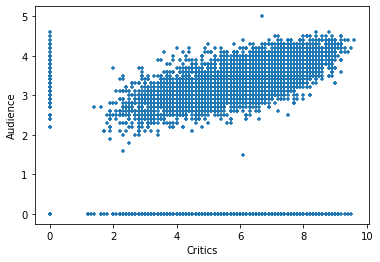

In [40]:
movie_scores.plot.scatter('Critics', 'Audience', marker='+')